Referências: 

1º https://matplotlib.org/3.1.0/gallery/pie_and_polar_charts/pie_and_donut_labels.html

2º https://leiaisso.net/zhw6a/

**Passos**

1º Eu utilizei dos ano de 2023 para reproduzir os gráficos, vejamos:

![Alt text](1.png)

Então baseado nisso eu anotei os valores e crie uma dataframe para criar os gráficos:

    data = {
        'Posicionamento Político': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'N/S', 'N/R'],
        'porcentagem': [11, 2, 4, 4, 16, 7, 5, 8, 3, 22, 12, 5]
         }
df = pd.DataFrame(data)

2º Passo:

Depois disso criei o gráfico de barra com as frequências dos votos, indo de 1 a 10, quanto mais próximo de 1 é mais para **esquerda** e mais próximo de 10 mais para **direita**.

3º Passo?

Criei um gráfico de pizza para representar o valor total das pessoas entrevistadas baseadas em sua porcentagem. Como por exemplo, **22% de 2258 pessoas representa 497 das pessoas se identificando de direita**.

**Gráfico de Barras**

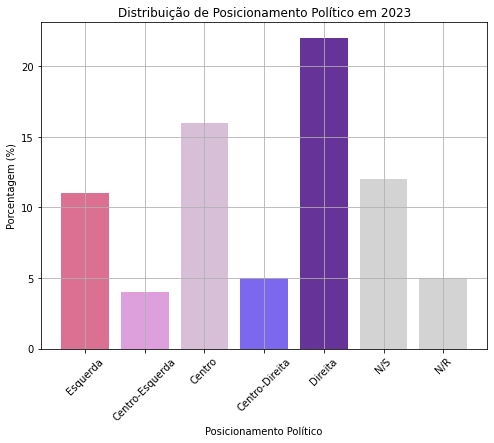

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados
data = {
    'Posicionamento Político': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'N/S', 'N/R'],
    '2023': [11, 2, 4, 4, 16, 7, 5, 8, 3, 22, 12, 5]
}

# Converter para DataFrame
df = pd.DataFrame(data)

# Mapear categorias para números (1 a 10)
categoria_map = {
    1: 'Esquerda',
    2: 'Esquerda',
    3: 'Esquerda',
    4: 'Centro-Esquerda',
    5: 'Centro',
    6: 'Centro',
    7: 'Centro-Direita',
    8: 'Direita',
    9: 'Direita',
    10: 'Direita',
    'N/S': 'N/S',
    'N/R': 'N/R'
}

# Com o map o valores de 1 a 10 serão atribuidos para esquerda, centro-esquerda, centro-direita 
df['Posicionamento Político'] = df['Posicionamento Político'].map(categoria_map)

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
colors = {
    'Esquerda': '#DB7093',
    'Centro': '#D8BFD8',
    'Direita': '#663399',
    'Centro-Esquerda': '#DDA0DD',
    'Centro-Direita': '#7B68EE',
    'N/S': '#D3D3D3',
    'N/R': '#D3D3D3'
}
plt.bar(df['Posicionamento Político'], df['2023'], color=[colors[c] for c in df['Posicionamento Político']])
plt.xlabel('Posicionamento Político')
plt.ylabel('Porcentagem (%)')
plt.grid()
plt.title('Distribuição de Posicionamento Político em 2023')
plt.xticks(rotation=45)
plt.show()

**Gráfico de pizza para conhecermos o total de pessoas baseado na porcentagem** 

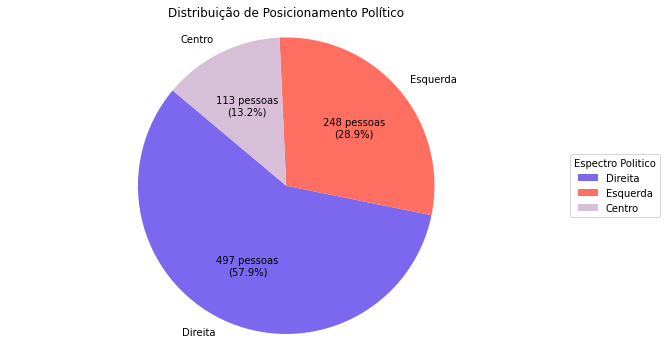

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

# Dados
categorias = ['Direita', 'Esquerda', 'Centro']
porcentagens = [0.22, 0.11, 0.05]  # Calculando a porcentagem de 'Outras'

# Calculando o número de entrevistados para cada categoria
total_entrevistados = 2258
num_entrevistados = [round(total_entrevistados * valores) for valores in porcentagens]


# Função para adicionar o total de pessoas ao grafico
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d} pessoas\n({:.1f}%)".format(absolute, pct)


# Criando o gráfico de pizza
colors = ['#7B68EE', '#FF6F61', '#D8BFD8']
# Criando os rotulos para serem utilizados no grafico
wedges, texts, autotexts = ax.pie(num_entrevistados, labels=categorias, colors=colors, autopct=lambda pct: func(pct, num_entrevistados), startangle=140)

# Legenda com as mesmas cores
ax.legend(wedges, categorias,
          title="Espectro Politico",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


# Criando o gráfico de pizza
colors = ['#7B68EE', '#FF6F61', '#D8BFD8']
plt.axis('equal')  # Faz com que o gráfico de pizza seja circular
plt.title('Distribuição de Posicionamento Político')
plt.show()
